# Step 1: Install and Import Libraries

In [ ]:
# Get time series data
#import yfinance as yf

# Prophet model for time series forecast
from prophet import Prophet

# Data processing
import numpy as np
import pandas as pd

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Model performance evaluation
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

# Step 2: Pull Data

In [ ]:
import pandas as pd
import requests

# Replace with your actual GitHub raw file URL
github_url = "https://raw.githubusercontent.com/cfwiecha/Fall2024Capstone/refs/heads/main/frontend_shipping_source_300m_30s_pruned.json"

try:
    response = requests.get(github_url)
    response.raise_for_status()  # Raise an exception for bad status codes (4xx or 5xx)

    data = response.json()
    df_train = pd.DataFrame( data['data']['result'][0]['values'] )
    df_train.columns = ['ds', 'y']
    print( df_train.head() )

except requests.exceptions.RequestException as e:
    print(f"Error fetching data from GitHub: {e}")
except ValueError as e:
    print(f"Error decoding JSON response: {e}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

           ds                   y
0  1699106670  3.2950819672131146
1  1699106700   3.175438596491228
2  1699106730  3.2285714285714286
3  1699106760   3.160714285714286
4  1699106790  3.3870967741935485


In [ ]:
import json

In [ ]:
#f = open("frontend_shipping_source_300m_30s_pruned.json")
#prom = json.load(f)
#df_train = pd.DataFrame( data['data']['result'][0]['values'] )
#df_train.columns = ['ds', 'y']
#df_train

,ds,y
0,1699106670,3.2950819672131146
1,1699106700,3.175438596491228
2,1699106730,3.2285714285714286
3,1699106760,3.160714285714286
4,1699106790,3.3870967741935485
...,...,...
352,1699117230,3.6335403726708075
353,1699117260,3.9684210526315793
354,1699117290,4.475
355,1699117320,4.05


In [ ]:
# Replace with your actual GitHub raw file URL
github_url = "https://raw.githubusercontent.com/cfwiecha/Fall2024Capstone/refs/heads/main/20min.json"

try:
    response = requests.get(github_url)
    response.raise_for_status()  # Raise an exception for bad status codes (4xx or 5xx)

    data = response.json()
    df_test = pd.DataFrame( data['data']['result'][0]['values'] )
    df_test.columns = ['ds', 'y']
    print( df_test.head() )

except requests.exceptions.RequestException as e:
    print(f"Error fetching data from GitHub: {e}")
except ValueError as e:
    print(f"Error decoding JSON response: {e}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")



           ds                   y
0  1699202340                 NaN
1  1699202370                 NaN
2  1699202400                 NaN
3  1699202430  3.5454545454545454
4  1699202460  3.2962962962962963


In [ ]:
df_test

,ds,y
0,1699202340,NaN
1,1699202370,NaN
2,1699202400,NaN
3,1699202430,3.5454545454545454
4,1699202460,3.2962962962962963
5,1699202490,3.142857142857143
6,1699202520,3.13953488372093
7,1699202550,3.817391304347826
8,1699202580,6.349557522123894
9,1699202610,5.376344086021506


In [ ]:
#align test timestamps with training by time shifting back to the first train time...assume test data starts from 0 cycle time like training data

train_start_ds = df_train['ds'].iloc[0]
print(train_start_ds)

df_train['ds'] = df_train['ds'] - train_start_ds

df_train.head()

1699106670


,ds,y
0,0,3.2950819672131146
1,30,3.175438596491228
2,60,3.2285714285714286
3,90,3.160714285714286
4,120,3.3870967741935485


In [ ]:
#align test timestamps with training by time shifting back to the first train time...assume test data starts from 0 cycle time like training data

test_start_ds = df_test['ds'].iloc[0]
print(test_start_ds)

df_test['ds'] = df_test['ds'] - test_start_ds

df_test.head()

1699202340


,ds,y
0,0,NaN
1,30,NaN
2,60,NaN
3,90,3.5454545454545454
4,120,3.2962962962962963


In [ ]:
from datetime import datetime

In [ ]:
df_train['ds'] = df_train['ds'].apply(lambda sec: datetime.fromtimestamp(sec))
df_train

,ds,y
0,1970-01-01 00:00:00,3.2950819672131146
1,1970-01-01 00:00:30,3.175438596491228
2,1970-01-01 00:01:00,3.2285714285714286
3,1970-01-01 00:01:30,3.160714285714286
4,1970-01-01 00:02:00,3.3870967741935485
...,...,...
352,1970-01-01 02:56:00,3.6335403726708075
353,1970-01-01 02:56:30,3.9684210526315793
354,1970-01-01 02:57:00,4.475
355,1970-01-01 02:57:30,4.05


In [ ]:
df_test['ds'] = df_test['ds'].apply(lambda sec: datetime.fromtimestamp(sec))
df_test

,ds,y
0,1970-01-01 00:00:00,NaN
1,1970-01-01 00:00:30,NaN
2,1970-01-01 00:01:00,NaN
3,1970-01-01 00:01:30,3.5454545454545454
4,1970-01-01 00:02:00,3.2962962962962963
5,1970-01-01 00:02:30,3.142857142857143
6,1970-01-01 00:03:00,3.13953488372093
7,1970-01-01 00:03:30,3.817391304347826
8,1970-01-01 00:04:00,6.349557522123894
9,1970-01-01 00:04:30,5.376344086021506


In [ ]:
# Information on the dataframe
df_train['y']=df_train['y'].astype(float)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      357 non-null    datetime64[ns]
 1   y       333 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.7 KB


In [ ]:
# Information on the dataframe
df_test['y']=df_test['y'].astype(float)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      40 non-null     datetime64[ns]
 1   y       37 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 768.0 bytes


Next, let's visualize the closing prices of the two tickers using `seaborn`, and add the legend to the plot using `matplotlib`. We can see that the price for Google increased a lot starting in late 2020, and almost doubled in late 2021.

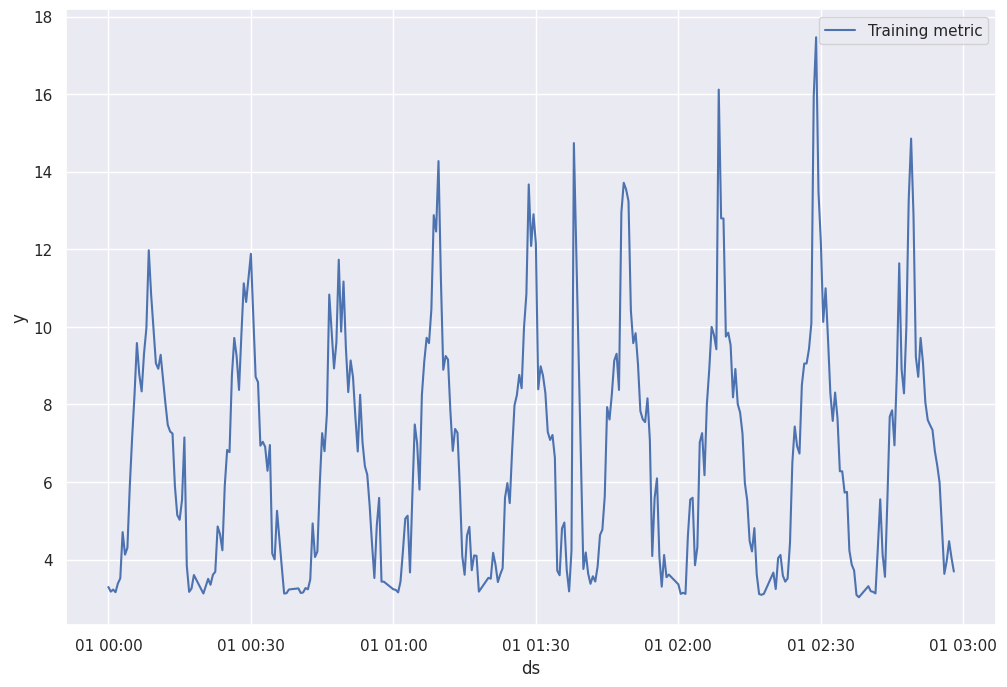

In [ ]:
# Visualize data using seaborn
sns.set(rc={'figure.figsize':(12,8)})
sns.lineplot(x=df_train['ds'], y=df_train['y'])
plt.legend(['Training metric'])

# Step 3: Build Time Series Model Using Prophet in Python

In [ ]:
# Add seasonality
model = Prophet(interval_width=0.99, yearly_seasonality=False, weekly_seasonality=False, daily_seasonality=False, growth='flat')
model.add_seasonality(name='hourly', period=1/24, fourier_order=5)

# Fit the model on the training dataset
model.fit(df_train)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpvgo51too/zxdinmod.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvgo51too/3ze9fbsp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47706', 'data', 'file=/tmp/tmpvgo51too/zxdinmod.json', 'init=/tmp/tmpvgo51too/3ze9fbsp.json', 'output', 'file=/tmp/tmpvgo51too/prophet_modeld9k_fx1c/prophet_model-20241029003704.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:37:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:37:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


# Step 4: Make Predictions Using Prophet in Python

After building the model, in step 4, we use the model to make predictions on the dataset. The forecast plot shows that the predictions are in general aligned with the actual values.

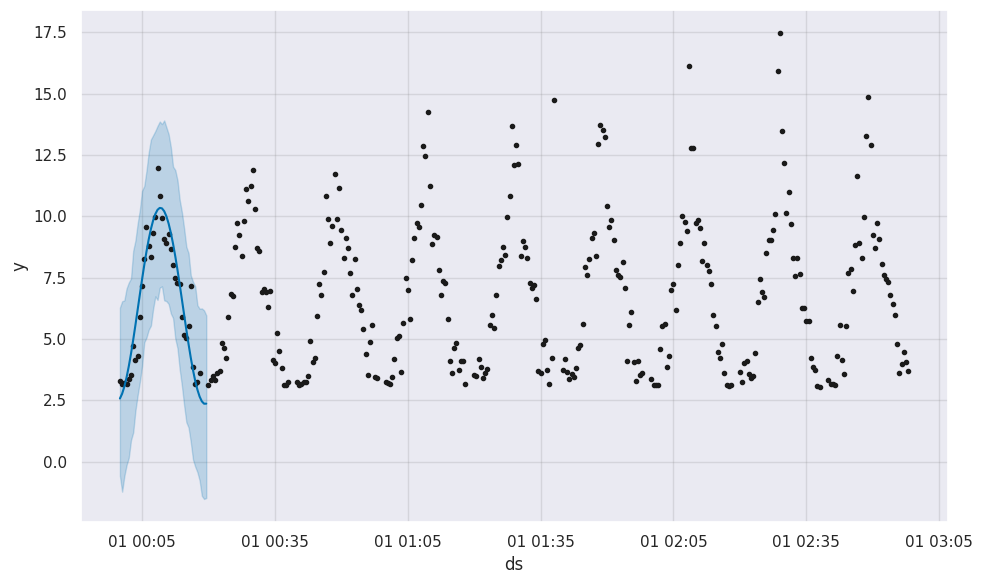

In [ ]:
# Make prediction
forecast = model.predict(df_test)

# Visualize the forecast
model.plot(forecast); # Add semi-colon to remove the duplicated chart

We can also check the components plot for the trend, weekly seasonality, and yearly seasonality.

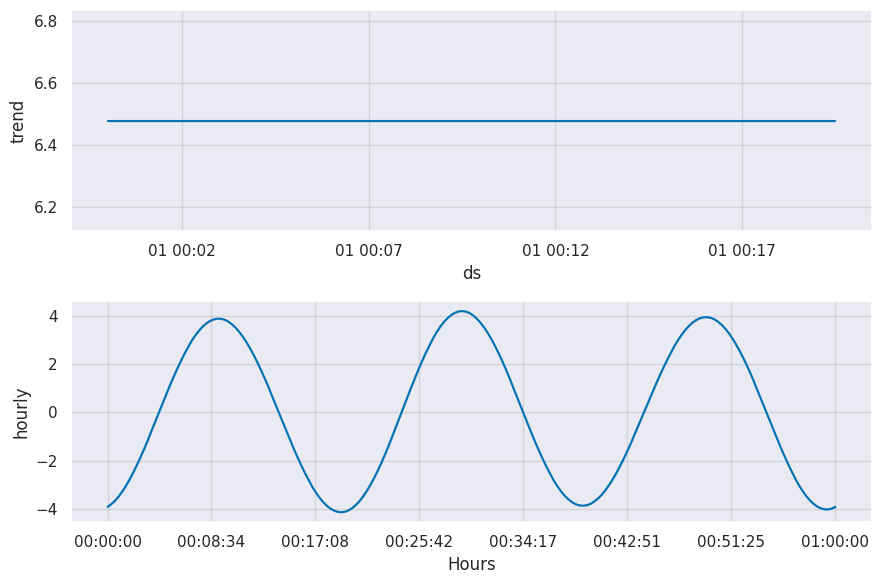

In [ ]:
# Visualize the forecast components
model.plot_components(forecast);

# Step 5: Check Time Series Model Performace

In [ ]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,hourly,hourly_lower,hourly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1970-01-01 00:00:00,6.4798,-0.571308,6.282545,6.4798,6.4798,-3.902250,-3.902250,-3.902250,-3.902250,-3.902250,-3.902250,0.0,0.0,0.0,2.577550
1,1970-01-01 00:00:30,6.4798,-1.220341,6.539512,6.4798,6.4798,-3.706557,-3.706557,-3.706557,-3.706557,-3.706557,-3.706557,0.0,0.0,0.0,2.773243
2,1970-01-01 00:01:00,6.4798,-0.582255,6.576867,6.4798,6.4798,-3.417576,-3.417576,-3.417576,-3.417576,-3.417576,-3.417576,0.0,0.0,0.0,3.062223
3,1970-01-01 00:01:30,6.4798,-0.136893,7.060824,6.4798,6.4798,-3.042928,-3.042928,-3.042928,-3.042928,-3.042928,-3.042928,0.0,0.0,0.0,3.436872
4,1970-01-01 00:02:00,6.4798,0.164059,7.302257,6.4798,6.4798,-2.592451,-2.592451,-2.592451,-2.592451,-2.592451,-2.592451,0.0,0.0,0.0,3.887349
5,1970-01-01 00:02:30,6.4798,0.877048,7.471168,6.4798,6.4798,-2.077927,-2.077927,-2.077927,-2.077927,-2.077927,-2.077927,0.0,0.0,0.0,4.401872
6,1970-01-01 00:03:00,6.4798,1.194898,8.594269,6.4798,6.4798,-1.512748,-1.512748,-1.512748,-1.512748,-1.512748,-1.512748,0.0,0.0,0.0,4.967052
7,1970-01-01 00:03:30,6.4798,2.078894,9.015595,6.4798,6.4798,-0.911539,-0.911539,-0.911539,-0.911539,-0.911539,-0.911539,0.0,0.0,0.0,5.568261
8,1970-01-01 00:04:00,6.4798,2.705656,9.699488,6.4798,6.4798,-0.289759,-0.289759,-0.289759,-0.289759,-0.289759,-0.289759,0.0,0.0,0.0,6.190040
9,1970-01-01 00:04:30,6.4798,3.258878,10.263332,6.4798,6.4798,0.336715,0.336715,0.336715,0.336715,0.336715,0.336715,0.0,0.0,0.0,6.816515


In [ ]:
# Merge actual and predicted values
performance = pd.merge(df_test, forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']], on='ds')

In [ ]:
performance

,ds,y,yhat,yhat_lower,yhat_upper
0,1970-01-01 00:00:00,NaN,2.577550,-0.571308,6.282545
1,1970-01-01 00:00:30,NaN,2.773243,-1.220341,6.539512
2,1970-01-01 00:01:00,NaN,3.062223,-0.582255,6.576867
3,1970-01-01 00:01:30,3.545455,3.436872,-0.136893,7.060824
4,1970-01-01 00:02:00,3.296296,3.887349,0.164059,7.302257
5,1970-01-01 00:02:30,3.142857,4.401872,0.877048,7.471168
6,1970-01-01 00:03:00,3.139535,4.967052,1.194898,8.594269
7,1970-01-01 00:03:30,3.817391,5.568261,2.078894,9.015595
8,1970-01-01 00:04:00,6.349558,6.190040,2.705656,9.699488
9,1970-01-01 00:04:30,5.376344,6.816515,3.258878,10.263332


In [ ]:
# Check MAE value
performance_MAE = mean_absolute_error(performance['y'], performance['yhat'])
print(f'The MAE for the model is {performance_MAE}')

# Check MAPE value
performance_MAPE = mean_absolute_percentage_error(performance['y'], performance['yhat'])
print(f'The MAPE for the model is {performance_MAPE}')

ValueError: Input contains NaN.

# Step 6: Identify Anomalies

In step 6, we will identify the time series anomalies by checking if the actual value is outside of the uncertainty interval. If the actual value is smaller than the lower bound or larger than the upper bound of the uncertainty interval, the anomaly indicator is set to 1, otherwise, it's set to 0.

Using `value_counts()`, we can see that there are 6 outliers out of 505 data points.

In [ ]:
# Create an anomaly indicator
performance['anomaly'] = performance.apply(lambda rows: 1 if ((float(rows.y)<rows.yhat_lower)|(float(rows.y)>rows.yhat_upper)) else 0, axis = 1)


In [ ]:
performance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   ds          40 non-null     datetime64[ns]
 1   y           37 non-null     float64       
 2   yhat        40 non-null     float64       
 3   yhat_lower  40 non-null     float64       
 4   yhat_upper  40 non-null     float64       
 5   anomaly     40 non-null     int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 2.0 KB


In [ ]:
# Check the number of anomalies
performance['anomaly'].value_counts()

,count
anomaly,
0,24
1,16


After printing out the anomalies, we can see that all the outliers are lower than the lower bound of the uncertainty interval.

In [ ]:
# Take a look at the anomalies
anomalies = performance[performance['anomaly']==1].sort_values(by='ds')
anomalies

,ds,y,yhat,yhat_lower,yhat_upper,anomaly
10,1970-01-01 00:05:00,3.757062,7.431813,3.905185,11.042921,1
11,1970-01-01 00:05:30,4.449664,8.020480,4.866366,11.238293,1
16,1970-01-01 00:08:00,14.864865,10.098865,6.743023,13.482017,1
17,1970-01-01 00:08:30,15.877404,10.271140,6.595588,13.688021,1
18,1970-01-01 00:09:00,17.566372,10.348221,7.096573,13.868093,1
19,1970-01-01 00:09:30,17.165842,10.328583,7.147970,13.763396,1
20,1970-01-01 00:10:00,23.097015,10.213021,6.579146,13.911803,1
21,1970-01-01 00:10:30,23.090909,10.004596,6.547121,13.630658,1
22,1970-01-01 00:11:00,19.969136,9.708540,6.433280,13.354601,1
23,1970-01-01 00:11:30,19.512195,9.332112,6.045839,12.824619,1


In the visualization, all the dots are actual values and the black line represents the predicted values. The orange dots are the outliers.

<Axes: xlabel='ds', ylabel='y'>

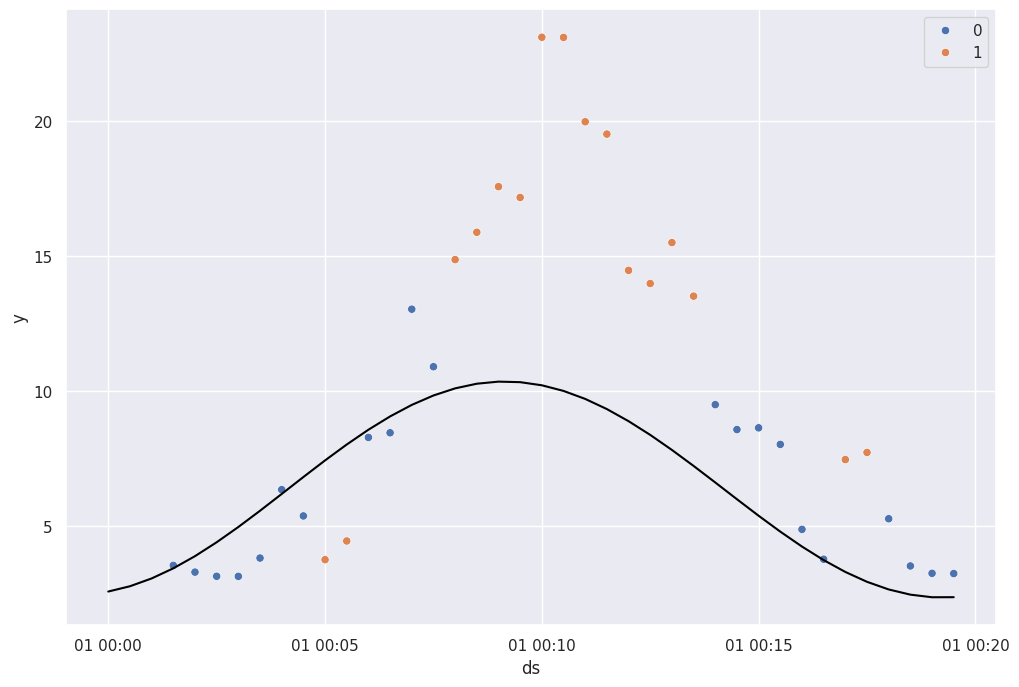

In [ ]:
# Visualize the anomalies
sns.scatterplot(x='ds', y='y', data=performance, hue='anomaly')
sns.lineplot(x='ds', y='yhat', data=performance, color='black')